In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
from sklearn.cluster import KMeans

In [2]:
data = pd.ExcelFile("University advancement dataset.xlsx")

In [3]:
df=pd.read_excel(data,'Sheet1')

In [4]:
df.head()

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,NaN,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,NaN,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,NaN,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,NaN,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,NaN,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID Number                       50000 non-null  int64  
 1   Title                           2490 non-null   object 
 2   Preferred Language              50000 non-null  object 
 3   Gender                          50000 non-null  object 
 4   Relationship Types              50000 non-null  object 
 5   Faculty of Graduation           50000 non-null  object 
 6   Year of Graduation              50000 non-null  int64  
 7   Province                        50000 non-null  object 
 8   Lifetime Giving                 50000 non-null  int64  
 9   Year of Last Gift               16086 non-null  float64
 10  Year of First Gift              16086 non-null  float64
 11  Largest Gift                    16088 non-null  float64
 12  Events Attended in Lifetime     

In [6]:
df.shape

(50000, 16)

In [7]:
df.isna().sum()

ID Number                             0
Title                             47510
Preferred Language                    0
Gender                                0
Relationship Types                    0
Faculty of Graduation                 0
Year of Graduation                    0
Province                              0
Lifetime Giving                       0
Year of Last Gift                 33914
Year of First Gift                33914
Largest Gift                      33912
Events Attended in Lifetime           0
Past Traveler Y/N                     0
# of Instances of Volunteering        0
# of Clicks in the Past Month         0
dtype: int64

In [8]:
df.nunique()

ID Number                         50000
Title                                 3
Preferred Language                    3
Gender                                3
Relationship Types                   21
Faculty of Graduation                25
Year of Graduation                   81
Province                             12
Lifetime Giving                    7636
Year of Last Gift                    81
Year of First Gift                   81
Largest Gift                       6796
Events Attended in Lifetime          16
Past Traveler Y/N                     2
# of Instances of Volunteering        4
# of Clicks in the Past Month        36
dtype: int64

In [10]:
df1 = df.copy()
df1.drop(columns=['Title'],inplace=True)


In [11]:
df1

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1
49996,149997,E,F,Graduate,Arts -- General,1992,MB,38181,1999.0,1993.0,35890.0,8,N,1,20
49997,149998,E,F,Graduate,Arts -- General,1974,QC,0,NaN,NaN,NaN,3,Y,2,5
49998,149999,E,M,Graduate,Arts -- General,1967,ON,0,NaN,NaN,NaN,1,N,0,12


In [12]:
df1['Preferred Language'].replace(' ', np.nan, regex=True,inplace=True)
df1['Year of Last Gift'].replace(' ', np.nan, regex=True,inplace=True)
df1['Year of First Gift'].replace(' ', np.nan, regex=True,inplace=True)
df1['Largest Gift'].replace(' ', np.nan, regex=True,inplace=True)

In [13]:
df1['Preferred Language'].isnull().mean()

0.21868

In [14]:
df1['Year of Last Gift'].isnull().mean()

0.67828

In [15]:
df1['Year of First Gift'].isnull().mean()

0.67828

In [16]:
df1['Largest Gift'].isnull().mean()

0.67824

#  ANALYSIS USING LOGISTIC REGRESSION

In [17]:
def donation(x):
    if x==0:
        return 0
    else:
        return 1

In [18]:
df1['Donation'] = df1['Lifetime Giving'].apply(lambda x : donation(x))

In [19]:
df1.head()

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Donation
0,100001,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27,1
1,100002,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19,1
2,100003,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18,1
3,100004,NaN,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10,1
4,100005,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16,1


In [20]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df1["Preferred Language"] = imp.fit_transform(df1[["Preferred Language"]]).ravel()

In [21]:
df1.drop(columns=['Year of Graduation','Largest Gift','Year of Last Gift','Year of First Gift'],inplace=True, axis=1)
df1

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Province,Lifetime Giving,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Donation
0,100001,E,M,Graduate,Medicine -- General,ON,73600,0,N,0,27,1
1,100002,E,M,Graduate,Arts -- General,NB,8035,14,N,1,19,1
2,100003,E,F,Graduate,Science -- General,ON,9675,15,N,1,18,1
3,100004,E,M,Graduate,Education -- General,BC,4070,14,N,2,10,1
4,100005,E,M,Graduate,Management,QC,13377,0,N,0,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,E,M,Graduate,Engineer -- General,ON,9174,15,Y,1,1,1
49996,149997,E,F,Graduate,Arts -- General,MB,38181,8,N,1,20,1
49997,149998,E,F,Graduate,Arts -- General,QC,0,3,Y,2,5,0
49998,149999,E,M,Graduate,Arts -- General,ON,0,1,N,0,12,0


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
la_Gender = LabelEncoder()
la_preferred_Language = LabelEncoder()
la_Relationship_Types = LabelEncoder()
la_Faculty_of_Graduation = LabelEncoder()
la_Province = LabelEncoder()
la_Past_Traveler_YN = LabelEncoder()

In [24]:
df1['Gender']=la_Gender.fit_transform(df1['Gender'])
df1['Preferred Language']=la_preferred_Language.fit_transform(df1['Preferred Language'])
df1['Relationship Types']=la_Relationship_Types.fit_transform(df1['Relationship Types'])
df1['Faculty of Graduation']=la_Faculty_of_Graduation.fit_transform(df1['Faculty of Graduation'])
df1['Province']=la_Province.fit_transform(df1['Province'])
df1['Past Traveler Y/N']=la_Past_Traveler_YN.fit_transform(df1['Past Traveler Y/N'])

In [25]:
df1

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Province,Lifetime Giving,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Donation
0,100001,0,1,0,16,7,73600,0,0,0,27,1
1,100002,0,1,0,3,3,8035,14,0,1,19,1
2,100003,0,0,0,22,7,9675,15,0,1,18,1
3,100004,0,1,0,9,1,4070,14,0,2,10,1
4,100005,0,1,0,14,9,13377,0,0,0,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,0,1,0,11,7,9174,15,1,1,1,1
49996,149997,0,0,0,3,2,38181,8,0,1,20,1
49997,149998,0,0,0,3,9,0,3,1,2,5,0
49998,149999,0,1,0,3,7,0,1,0,0,12,0


In [26]:
x = df1.iloc[:, 0:11].values
x

array([[100001,      0,      1, ...,      0,      0,     27],
       [100002,      0,      1, ...,      0,      1,     19],
       [100003,      0,      0, ...,      0,      1,     18],
       ...,
       [149998,      0,      0, ...,      1,      2,      5],
       [149999,      0,      1, ...,      0,      0,     12],
       [150000,      0,      1, ...,      0,      3,     12]], dtype=int64)

In [27]:
y=df1['Donation'].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4)

In [29]:
from sklearn.linear_model import LogisticRegression

Logistic_regressor = LogisticRegression()

In [30]:
Logistic_regressor.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred = Logistic_regressor.predict(x_test)
y_pred 

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [32]:
Logistic_regressor.score(x_test,y_test)

0.9996

# TO IDENTIFY DIFFERENT CLUSTERS USING K-MEANS CLUSTERS

In [33]:
import pkgs

In [34]:
! pip install yellowbrick

In [35]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Elbow Method for Clustering

In [36]:
model = KMeans()


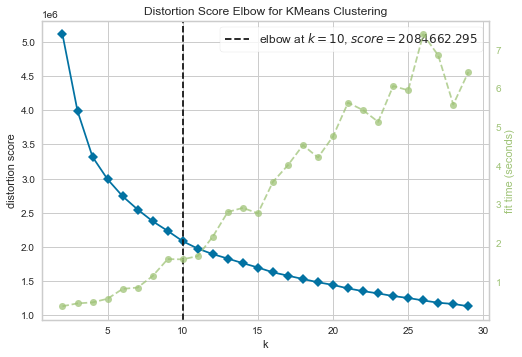

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)

visualizer.fit(df1[['Province','Faculty of Graduation','Donation','Past Traveler Y/N','Preferred Language','Gender','Events Attended in Lifetime','Past Traveler Y/N','Preferred Language','# of Clicks in the Past Month','Relationship Types']])        
visualizer.show()        